In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
#Reading dataset 
data_march = pd.read_csv('2022_03_Marc_TRAMS_TRAMS.csv')
data_march.head()

#make dataset data column in a proper way of datetime 
data_march['data'] = pd.to_datetime(data_march['data'],format='%Y%m%d%H%M%S')
data_march.head()

#Make a copy of the dataset 
df = data_march.copy()

# creat number of week ()
df['Year-Week'] = df['data'].dt.strftime('%Y-%U')

#name of the month
df['Month']= df['data'].dt.strftime('%B')

#make the name of the week
df['day']= df['data'].dt.day_name()

#extract the time 
df['time'] = df['data'].dt.time

#Create Hour, Minute and second
df['hour'] = df['data'].dt.hour
df['minute'] = df['data'].dt.minute
df['second'] = df['data'].dt.second

df.head()

df.head()

,idTram,data,estatActual,estatPrevist,Year-Week,Month,day,time,hour,minute,second
0,1,2022-03-01 00:00:55,1,0,2022-09,March,Tuesday,00:00:55,0,0,55
1,2,2022-03-01 00:00:55,1,0,2022-09,March,Tuesday,00:00:55,0,0,55
2,3,2022-03-01 00:00:55,0,0,2022-09,March,Tuesday,00:00:55,0,0,55
3,4,2022-03-01 00:00:55,1,0,2022-09,March,Tuesday,00:00:55,0,0,55
4,5,2022-03-01 00:00:55,0,0,2022-09,March,Tuesday,00:00:55,0,0,55


In [3]:
#Dataset info
print(data_march.info())
print('*'*50)

#Description of DataSet
print(data_march.describe())
print('*'*50)

#Check if there is any NULL value
print(data_march.isnull().sum())
print('*'*50)

#Counting Unique number of each column
print(data_march.nunique())
print('*'*50)

df['Year-Week'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599656 entries, 0 to 4599655
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   idTram        int64         
 1   data          datetime64[ns]
 2   estatActual   int64         
 3   estatPrevist  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 140.4 MB
None
**************************************************
             idTram   estatActual  estatPrevist
count  4.599656e+06  4.599656e+06  4.599656e+06
mean   2.646300e+02  1.074918e+00  1.025943e+00
std    1.530840e+02  1.170469e+00  1.213188e+00
min    1.000000e+00  0.000000e+00  0.000000e+00
25%    1.320000e+02  0.000000e+00  0.000000e+00
50%    2.640000e+02  1.000000e+00  1.000000e+00
75%    3.960000e+02  2.000000e+00  2.000000e+00
max    5.340000e+02  6.000000e+00  6.000000e+00
**************************************************
idTram          0
data            0
estatActual     0
estatPrevist    0
dtype: int64
*

array(['2022-09', '2022-10', '2022-11', '2022-12', '2022-13'],
      dtype=object)

In [4]:
df = df.sort_values(by='data')
df

,idTram,data,estatActual,estatPrevist,Year-Week,Month,day,time,hour,minute,second
0,1,2022-03-01 00:00:55,1,0,2022-09,March,Tuesday,00:00:55,0,0,55
360,361,2022-03-01 00:00:55,0,0,2022-09,March,Tuesday,00:00:55,0,0,55
359,360,2022-03-01 00:00:55,0,0,2022-09,March,Tuesday,00:00:55,0,0,55
358,359,2022-03-01 00:00:55,0,0,2022-09,March,Tuesday,00:00:55,0,0,55
357,358,2022-03-01 00:00:55,0,0,2022-09,March,Tuesday,00:00:55,0,0,55
...,...,...,...,...,...,...,...,...,...,...,...
4599296,168,2022-03-31 23:55:56,1,0,2022-13,March,Thursday,23:55:56,23,55,56
4599295,167,2022-03-31 23:55:56,1,0,2022-13,March,Thursday,23:55:56,23,55,56
4599294,166,2022-03-31 23:55:56,1,0,2022-13,March,Thursday,23:55:56,23,55,56
4599308,180,2022-03-31 23:55:56,2,0,2022-13,March,Thursday,23:55:56,23,55,56


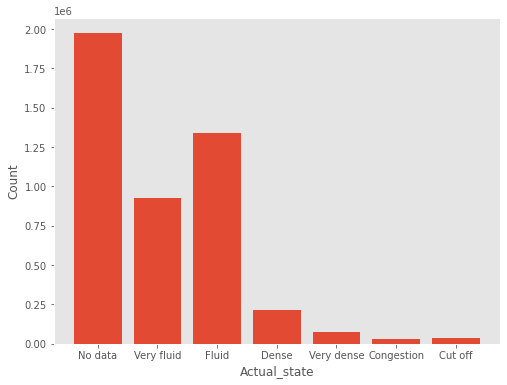

In [5]:
#Create a label for each Traffic State and see the Distribution of it
labels, counts = np.unique(df['estatActual'], return_counts=True)
_labels = ['No data', 'Very fluid', 'Fluid', 'Dense', 'Very dense', 'Congestion', 'Cut off']
plt.figure(figsize=(8, 6))
plt.bar(_labels, counts, align='center')
plt.gca().set_xticks(_labels)
plt.grid()
plt.ylabel('Count')
plt.xlabel('Actual_state')
plt.show()

In [13]:
df['date'] = df['data'].dt.strftime('%D')
df['date'] = pd.to_datetime(df.date)
#df
dff = df.loc[df["estatActual"] != 0]
#dff.shape
columns = ['estatPrevist', 'data', 'Year-Week', 'Month', 'time', 'minute','second']
dff = dff.drop(columns, axis=1)


dff.head()
first_column = dff.pop('date')
  
# insert column using insert(position,column_name,
# first_column) function
dff.insert(0, 'date' ,first_column)
first_column = dff.pop('hour')
  
# insert column using insert(position,column_name,
# first_column) function
dff.insert(1, 'hour' ,first_column)
dff

,date,hour,idTram,estatActual,day
0,2022-03-01,0,1,1,Tuesday
361,2022-03-01,0,362,1,Tuesday
392,2022-03-01,0,393,2,Tuesday
390,2022-03-01,0,391,4,Tuesday
385,2022-03-01,0,386,1,Tuesday
...,...,...,...,...,...
4599296,2022-03-31,23,168,1,Thursday
4599295,2022-03-31,23,167,1,Thursday
4599294,2022-03-31,23,166,1,Thursday
4599308,2022-03-31,23,180,2,Thursday


In [17]:
dff = dff.sort_values(by=['date','hour'])
dff

,date,hour,idTram,estatActual,day
0,2022-03-01,0,1,1,Tuesday
361,2022-03-01,0,362,1,Tuesday
392,2022-03-01,0,393,2,Tuesday
390,2022-03-01,0,391,4,Tuesday
385,2022-03-01,0,386,1,Tuesday
...,...,...,...,...,...
4599296,2022-03-31,23,168,1,Thursday
4599295,2022-03-31,23,167,1,Thursday
4599294,2022-03-31,23,166,1,Thursday
4599314,2022-03-31,23,186,2,Thursday


In [18]:
#total count of 'id_tram’ values for each 'trafficState’ and 'hour’and 'week_year' in the DataFrame:
dfff = dff.loc[:,['date','hour','day','idTram','estatActual']]
df_pivot = pd.pivot_table(dfff, values='idTram', index='estatActual', columns=['date','hour'],aggfunc='count')
df_pivot

date        2022-03-01                                                       \
hour                0       1      2      3      4       5       6       7    
estatActual                                                                   
1               1595.0  1028.0  776.0  674.0  806.0  1296.0  1924.0  1328.0   
2                280.0   150.0   91.0   95.0   71.0   404.0  1005.0  2258.0   
3                 42.0    21.0   15.0   19.0   28.0    35.0   123.0   490.0   
4                 19.0    16.0   15.0   13.0    9.0    12.0    20.0   181.0   
5                 18.0    11.0   14.0    6.0   12.0    15.0    22.0    68.0   
6                 48.0    48.0   48.0   48.0   48.0    48.0    48.0    48.0   

date                         ... 2022-03-31                                  \
hour             8       9   ...         14      15      16      17      18   
estatActual                  ...                                              
1             587.0   623.0  ...      945.0   895.0   741.0   578.0   459.0   
2            2568.0  2648.0  ...     2964.0  2971.0  2942.0  2778.0  2468.0   
3             829.0   759.0  ...      484.0   539.0   604.0   846.0   802.0   
4             430.0   415.0  ...      185.0   190.0   236.0   355.0   372.0   
5             205.0   185.0  ...       86.0    51.0    84.0   112.0   166.0   
6              48.0    48.0  ...       48.0    48.0    48.0    48.0    48.0   

date                                                 
hour             19      20      21      22      23  
estatActual                                          
1             501.0   786.0  1648.0  2532.0  2485.0  
2            2684.0  2932.0  2375.0  1111.0   699.0  
3             807.0   529.0   219.0    87.0    49.0  
4             382.0   190.0    60.0    21.0    21.0  
5             145.0    56.0    14.0     7.0    10.0  
6              72.0    48.0    48.0    48.0    48.0  

[6 rows x 736 columns]

In [29]:
#Transfer row to columns
df_pivot1 = df_pivot.T
df_pivot1 = df_pivot1.reset_index()
#df_pivot1
#change the columns name of traffic state
df_pivot1.columns = ['date','hour', 'trams_Very fluid', 'trams_fluid', 'trams_Dense','trams_Very dense','trams_Congestion', 'trams_cutoff']
#Total Tramid count per day and hour
df_pivot1

,date,hour,trams_Very fluid,trams_fluid,trams_Dense,trams_Very dense,trams_Congestion,trams_cutoff
0,2022-03-01,0,1595.0,280.0,42.0,19.0,18.0,48.0
1,2022-03-01,1,1028.0,150.0,21.0,16.0,11.0,48.0
2,2022-03-01,2,776.0,91.0,15.0,15.0,14.0,48.0
3,2022-03-01,3,674.0,95.0,19.0,13.0,6.0,48.0
4,2022-03-01,4,806.0,71.0,28.0,9.0,12.0,48.0
...,...,...,...,...,...,...,...,...
731,2022-03-31,19,501.0,2684.0,807.0,382.0,145.0,72.0
732,2022-03-31,20,786.0,2932.0,529.0,190.0,56.0,48.0
733,2022-03-31,21,1648.0,2375.0,219.0,60.0,14.0,48.0
734,2022-03-31,22,2532.0,1111.0,87.0,21.0,7.0,48.0


In [32]:
df_pivot1 = df_pivot1.set_index(['date','hour'])
df_pivot1

trams_Very fluid  trams_fluid  trams_Dense  trams_Very dense  \
date       hour                                                                 
2022-03-01 0               1595.0        280.0         42.0              19.0   
           1               1028.0        150.0         21.0              16.0   
           2                776.0         91.0         15.0              15.0   
           3                674.0         95.0         19.0              13.0   
           4                806.0         71.0         28.0               9.0   
...                           ...          ...          ...               ...   
2022-03-31 19               501.0       2684.0        807.0             382.0   
           20               786.0       2932.0        529.0             190.0   
           21              1648.0       2375.0        219.0              60.0   
           22              2532.0       1111.0         87.0              21.0   
           23              2485.0        699.0         49.0              21.0   

                 trams_Congestion  trams_cutoff  
date       hour                                  
2022-03-01 0                 18.0          48.0  
           1                 11.0          48.0  
           2                 14.0          48.0  
           3                  6.0          48.0  
           4                 12.0          48.0  
...                           ...           ...  
2022-03-31 19               145.0          72.0  
           20                56.0          48.0  
           21                14.0          48.0  
           22                 7.0          48.0  
           23                10.0          48.0  

[736 rows x 6 columns]

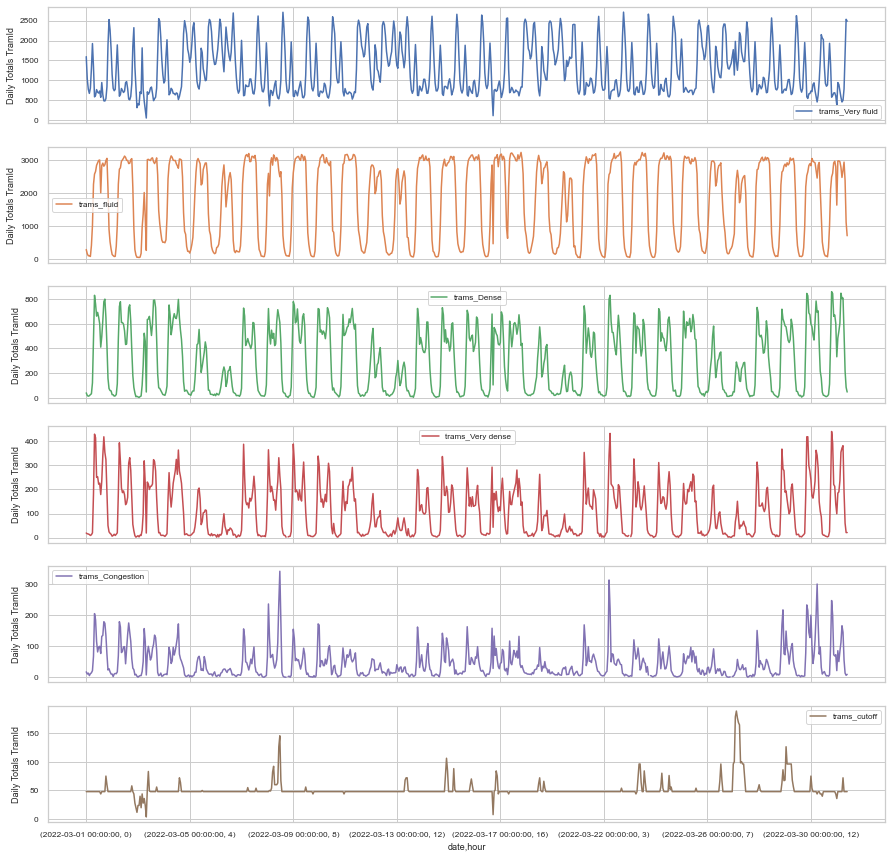

In [45]:
cols_plot = ['trams_Very fluid', 'trams_fluid', 'trams_Dense','trams_Very dense','trams_Congestion', 'trams_cutoff']
axes = df_pivot1[cols_plot].plot(linestyle='-', figsize=(15, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals TramId')
    
plt.savefig("myImage.png", format="png")    

In [51]:
#total count of unique 'id_tram’ values for each 'trafficState’ and 'hour’  in the DataFrame:
dfff = dff.loc[:,['date','hour','day','idTram','estatActual']]
df_pivot_unique_hour = pd.pivot_table(dfff, values='idTram', index='estatActual', columns=['hour'],aggfunc=pd.Series.nunique)
df_pivot_unique_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
estatActual,,,,,,,,,,,,,,,,,,,,,
1,370,362,335,327,318,349,364,373,371,371,...,319,356,343,317,296,302,321,366,373,373
2,323,287,231,247,242,265,346,410,411,413,...,405,404,404,407,406,405,403,411,393,366
3,158,129,111,109,99,96,168,272,335,328,...,322,308,330,347,340,339,315,257,183,186
4,95,65,61,64,60,57,87,169,241,252,...,204,198,218,257,259,261,216,148,93,102
5,47,33,30,30,27,29,38,87,157,172,...,125,117,135,153,169,154,138,73,49,55
6,4,4,4,4,4,4,4,4,7,17,...,25,23,16,19,25,19,16,10,6,6


<AxesSubplot:xlabel='hour', ylabel='estatActual'>

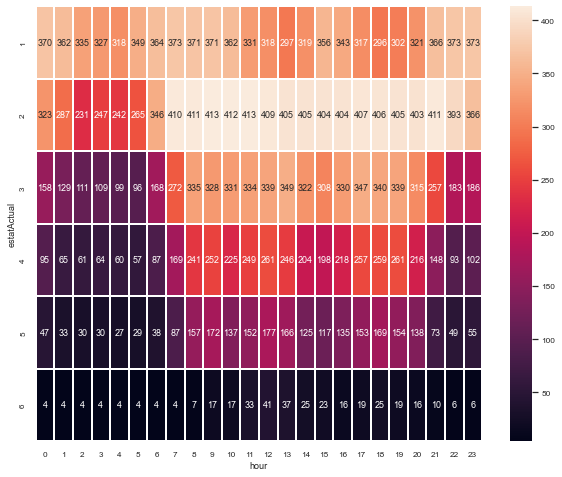

In [52]:
#HeatMap unique IdTram per hour
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_pivot_unique_hour, annot=True, fmt="d" ,linewidths=2.0, ax=ax)

In [53]:
#Transfer row to columns
df_pivot_unique_hour1 = df_pivot_unique_hour.T
df_pivot_unique_hour1  = df_pivot_unique_hour1 .reset_index()

#change the columns name of traffic state
df_pivot_unique_hour1 .columns = ['hour', 'trams_Very fluid', 'trams_fluid', 'trams_Dense','trams_Very dense','trams_Congestion', 'trams_cutoff']
#Total Unique Tramid count per day and hour
df_pivot_unique_hour1 

,hour,trams_Very fluid,trams_fluid,trams_Dense,trams_Very dense,trams_Congestion,trams_cutoff
0,0,370,323,158,95,47,4
1,1,362,287,129,65,33,4
2,2,335,231,111,61,30,4
3,3,327,247,109,64,30,4
4,4,318,242,99,60,27,4
5,5,349,265,96,57,29,4
6,6,364,346,168,87,38,4
7,7,373,410,272,169,87,4
8,8,371,411,335,241,157,7
9,9,371,413,328,252,172,17


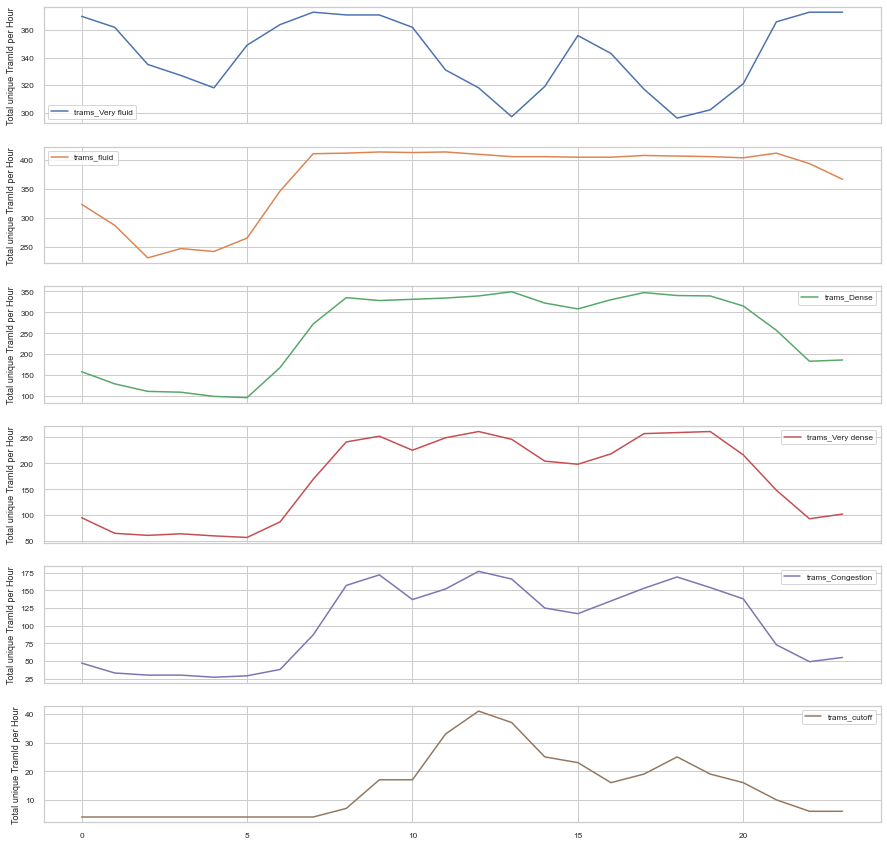

In [54]:
cols_plot = ['trams_Very fluid', 'trams_fluid', 'trams_Dense','trams_Very dense','trams_Congestion', 'trams_cutoff']
axes = df_pivot_unique_hour1 [cols_plot].plot(linestyle='-', figsize=(15, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Total unique TramId per Hour')
    
plt.savefig("Total unique TramId per Hour.png", format="png") 

,day,trams_Very fluid,trams_fluid,trams_Dense,trams_Very dense,trams_Congestion,trams_cutoff
0,Monday,373,405,347,257,159,9
1,Tuesday,377,407,366,302,239,49
2,Wednesday,376,406,364,305,211,21
3,Thursday,376,420,370,308,202,21
4,Friday,371,420,357,274,176,10
5,Saturday,369,404,327,233,145,15
6,Sunday,369,400,291,168,94,21


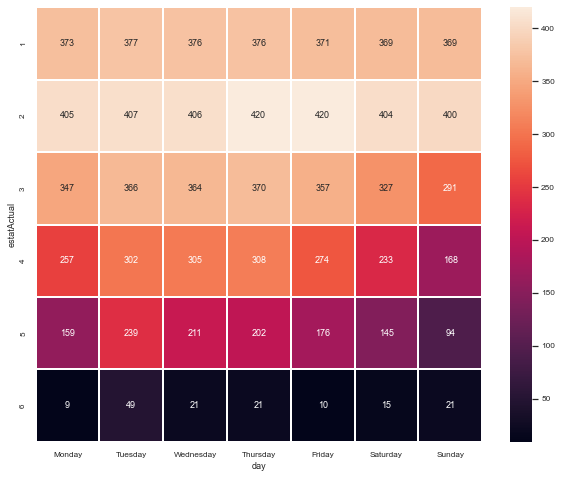

In [94]:
dfff = dff.loc[:,['date','hour','day','idTram','estatActual']]
dfff['day'].unique()
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
dfff['day'] = dfff['day'].astype(cat_type)
df_pivot_unique_day = pd.pivot_table(dfff, values='idTram', index='estatActual', columns=['day'],aggfunc=pd.Series.nunique)
df_pivot_unique_day

#HeatMap unique IdTram per hour
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_pivot_unique_day, annot=True, fmt="d" ,linewidths=2.0, ax=ax)

#Transfer row to columns
df_pivot_unique_day1 = df_pivot_unique_day.T
df_pivot_unique_day1  = df_pivot_unique_day1 .reset_index()

#change the columns name of traffic state
df_pivot_unique_day1 .columns = ['day', 'trams_Very fluid', 'trams_fluid', 'trams_Dense','trams_Very dense','trams_Congestion', 'trams_cutoff']
#Total Unique Tramid count per day and day
df_pivot_unique_day1 = df_pivot_unique_day1.sort_values(by='day')
df_pivot_unique_day1 

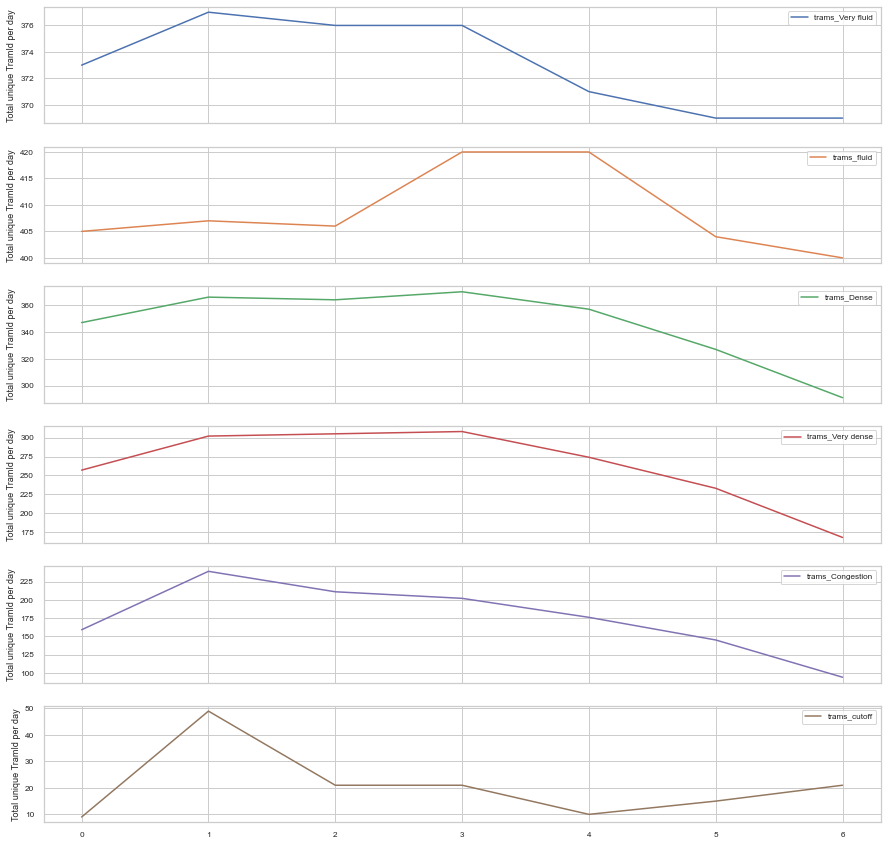

In [95]:
cols_plot = ['trams_Very fluid', 'trams_fluid', 'trams_Dense','trams_Very dense','trams_Congestion', 'trams_cutoff']
axes = df_pivot_unique_day1 [cols_plot].plot(linestyle='-', figsize=(15, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Total unique TramId per day')
    
plt.savefig("Total unique TramId per Day.png", format="png")

In [63]:
#total count of unique 'id_tram’ values for each 'trafficState’ and 'date’, and 'hour'  in the DataFrame:
dfff = dff.loc[:,['date','hour','day','idTram','estatActual']]
df_pivot_unique_date_hour = pd.pivot_table(dfff, values='idTram', index='estatActual', columns=['date','hour'],aggfunc=pd.Series.nunique)
df_pivot_unique_date_hour
#Transfer row to columns
df_pivot_unique_date_hour1 = df_pivot_unique_date_hour.T
df_pivot_unique_date_hour1  = df_pivot_unique_date_hour1 .reset_index()

#change the columns name of traffic state
df_pivot_unique_date_hour1.columns = ['date','hour', 'trams_Very fluid', 'trams_fluid', 'trams_Dense','trams_Very dense','trams_Congestion', 'trams_cutoff']
#Total Unique Tramid count per date and hour
df_pivot_unique_date_hour1

,date,hour,trams_Very fluid,trams_fluid,trams_Dense,trams_Very dense,trams_Congestion,trams_cutoff
0,2022-03-01,0,249.0,78.0,23.0,9.0,8.0,4.0
1,2022-03-01,1,189.0,51.0,15.0,4.0,5.0,4.0
2,2022-03-01,2,139.0,29.0,12.0,10.0,6.0,4.0
3,2022-03-01,3,118.0,40.0,12.0,6.0,1.0,4.0
4,2022-03-01,4,140.0,40.0,15.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...
731,2022-03-31,19,110.0,332.0,192.0,98.0,43.0,8.0
732,2022-03-31,20,147.0,344.0,141.0,58.0,23.0,4.0
733,2022-03-31,21,263.0,322.0,75.0,29.0,7.0,4.0
734,2022-03-31,22,326.0,204.0,38.0,13.0,4.0,4.0


In [67]:
df_pivot_unique_date_hour2 = df_pivot_unique_date_hour1.set_index(['date','hour'])

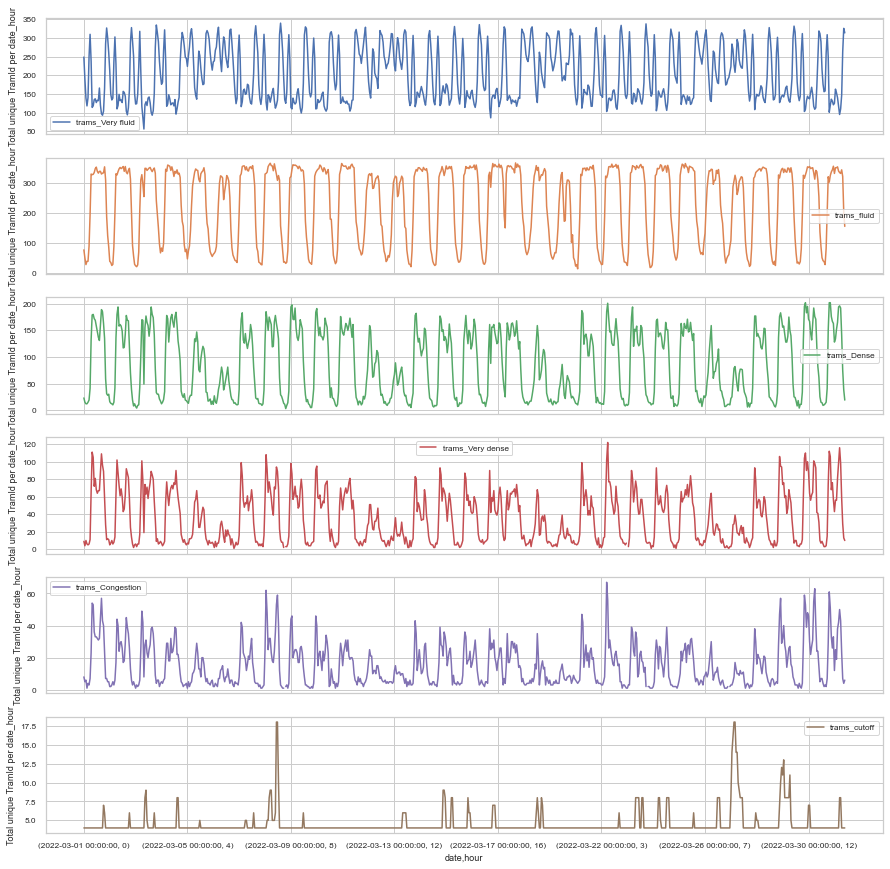

In [68]:
cols_plot = ['trams_Very fluid', 'trams_fluid', 'trams_Dense','trams_Very dense','trams_Congestion', 'trams_cutoff']
axes = df_pivot_unique_date_hour2[cols_plot].plot(linestyle='-', figsize=(15, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Total unique TramId per date_hour')
    
plt.savefig("Total unique TramId per date_hour.png", format="png") 

In [3]:
from datetime import date
import holidays
  
# Select country
uk_holidays = holidays.Spain()
  
# Print all the holidays in UnitedKingdom in year 2018
for ptr in holidays.Spain(years = 2022).items():
    print(ptr)

(datetime.date(2022, 1, 1), 'Año nuevo')
(datetime.date(2022, 1, 6), 'Epifanía del Señor')
(datetime.date(2022, 4, 15), 'Viernes Santo')
(datetime.date(2022, 8, 15), 'Asunción de la Virgen')
(datetime.date(2022, 10, 12), 'Día de la Hispanidad')
(datetime.date(2022, 11, 1), 'Todos los Santos')
(datetime.date(2022, 12, 6), 'Día de la Constitución Española')
(datetime.date(2022, 12, 8), 'La Inmaculada Concepción')
(datetime.date(2022, 12, 26), 'Navidad (Trasladado)')


In [80]:
data_Tram = pd.read_csv('transit_relacio_trams.csv')
data_Tram.head()

,Tram,Descripció,Coordenades
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"2.11203535639414,41.3841912394771,2.1015028628..."
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"2.111944376806616,41.38446666680338,2.10159408..."
2,3,Diagonal (Doctor Marañón a Pl. Pius XII),"2.112093343037027,41.38422850920645,2.12264979..."
3,4,Diagonal (Pl. Pius XII a Doctor Marañón),"2.122592049318304,41.38719094189204,2.11196902..."
4,5,Diagonal (Pl. Pius XII a Pl. Maria Cristina),"2.122657659295115,41.38694195794678,2.12755961..."


In [81]:
split_data = data_Tram.Coordenades.str.strip(')').str.strip('(').str.split(',')
data_Tram['start_lat'] = split_data.apply(lambda x: x[1])
data_Tram['start_lon'] = split_data.apply(lambda x: x[0])
data_Tram.head()

,Tram,Descripció,Coordenades,start_lat,start_lon
0,1,Diagonal (Ronda de Dalt a Doctor Marañón),"2.11203535639414,41.3841912394771,2.1015028628...",41.3841912394771,2.11203535639414
1,2,Diagonal (Doctor Marañón a Ronda de Dalt),"2.111944376806616,41.38446666680338,2.10159408...",41.38446666680338,2.111944376806616
2,3,Diagonal (Doctor Marañón a Pl. Pius XII),"2.112093343037027,41.38422850920645,2.12264979...",41.38422850920645,2.112093343037027
3,4,Diagonal (Pl. Pius XII a Doctor Marañón),"2.122592049318304,41.38719094189204,2.11196902...",41.38719094189204,2.122592049318304
4,5,Diagonal (Pl. Pius XII a Pl. Maria Cristina),"2.122657659295115,41.38694195794678,2.12755961...",41.38694195794678,2.122657659295115


In [82]:
columns = ['Descripció', 'Coordenades']
df_Tram_Start_point = data_Tram.drop(columns, axis=1)
df_Tram_Start_point.head()

,Tram,start_lat,start_lon
0,1,41.3841912394771,2.11203535639414
1,2,41.38446666680338,2.111944376806616
2,3,41.38422850920645,2.112093343037027
3,4,41.38719094189204,2.122592049318304
4,5,41.38694195794678,2.122657659295115


In [83]:
df_Tram_Start_point['start_lon1'] = pd.to_numeric(df_Tram_Start_point['start_lon'],errors='coerce')
df_Tram_Start_point['start_lat1'] = pd.to_numeric(df_Tram_Start_point['start_lat'],errors='coerce')


In [84]:
columns = ['start_lon', 'start_lat']
df_Tram_Start_point = df_Tram_Start_point.drop(columns, axis=1)
df_Tram_Start_point.head()


,Tram,start_lon1,start_lat1
0,1,2.112035,41.384191
1,2,2.111944,41.384467
2,3,2.112093,41.384229
3,4,2.122592,41.387191
4,5,2.122658,41.386942


In [85]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [86]:
Tram_map = folium.Map(location=[df_Tram_Start_point['start_lat1'].mean(), 
                                df_Tram_Start_point['start_lon1'].mean()], 
                                zoom_start=4)
Tram_map.add_child(FastMarkerCluster(df_Tram_Start_point[['start_lat1', 'start_lon1']].values.tolist()))
Tram_map

In [87]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
heat_Tram_map = folium.Map(location=[df_Tram_Start_point['start_lat1'].mean(), 
                                df_Tram_Start_point['start_lon1'].mean()], 
                                zoom_start=6)
latlons = df_Tram_Start_point[['start_lat1', 'start_lon1']].values.tolist()
from folium.plugins import HeatMap
HeatMap(latlons).add_to(heat_Tram_map)
heat_Tram_map

In [34]:
heat_Tram_map.save("heat_Tram_map.html")